<a href="https://colab.research.google.com/github/Hao-Zhang-2000/Task-2-GMM-/blob/main/GMM%EF%BC%88high_dimention%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

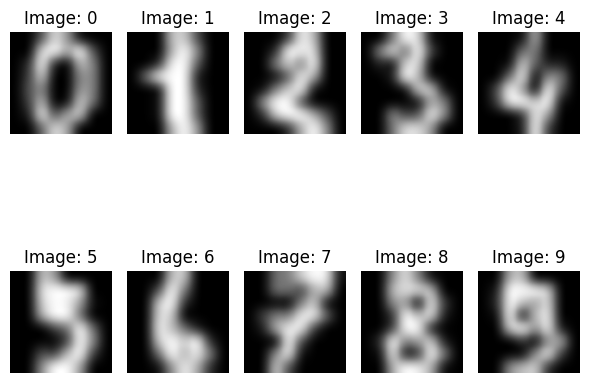

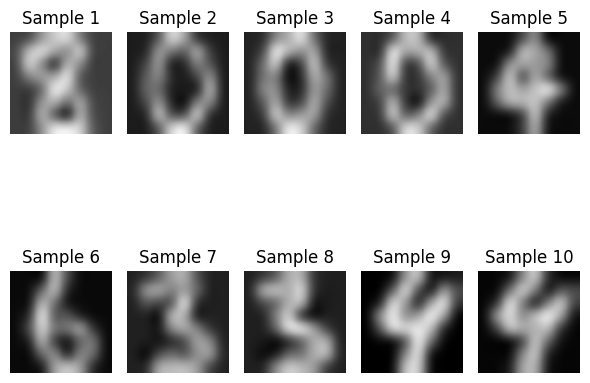

MMD with squared exponential kernel): 0.1028484872000339
MMD with inverse multi-quadratic kernel): 0.09934817890468858


In [1]:
#GMM model
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist

#Upload the data set

digits = load_digits()
data = digits.data

images = digits.images
labels = digits.target



# Visualize the data set (use quadric interpolation to make images smoother)
plt.figure(figsize=(6, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i],interpolation='quadric', cmap='gray')
    plt.title(f"Image: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# GMM model with component=10
n_components = 100
gmm = GaussianMixture(n_components=n_components,  covariance_type='full',random_state=0)
gmm.fit(data)

#Generate samples from the fitted GMM
num_samples = 100
samples, _ = gmm.sample(num_samples)

#Visualize the samples (also use quadric interpolation to make images smoother)
plt.figure(figsize=(6, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(samples[i].reshape(8, 8), interpolation='quadric', cmap='gray')
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#MMD (as used in task one)
def squared_distances(X, Y):
    """
    Compute the squared Euclidean distances between each pair of points in the two datasets X and Y.

    :param X: Array of shape (n_samples_X, n_features).
    :param Y: Array of shape (n_samples_Y, n_features).
    :return: Matrix of shape (n_samples_X, n_samples_Y) where each element represents the squared distance.
    """
    # Expand the squares of X and Y
    X_square = np.sum(np.square(X), axis=1, keepdims=True)
    Y_square = np.sum(np.square(Y), axis=1, keepdims=True)

    # Compute the squared distances
    squared_dist = X_square - 2 * np.dot(X, Y.T) + Y_square.T
    return squared_dist
def se_kernel_custom(X, Y, gamma=None):
    """
    Compute the Radial Basis Function (RBF) kernel (squared exponential) between each pair of points in X and Y.

    :param X: First dataset.
    :param Y: Second dataset.
    :param gamma: Gamma parameter for the RBF kernel. If None, it's set to 1/n_features.
    :return: RBF kernel matrix.
    """
    if gamma is None:
        gamma = 1.0 / X.shape[1]  # 1/n_features

    sq_dists = squared_distances(X, Y)
    return np.exp(-gamma * sq_dists)

def mqk_kernel_custom(X, Y, gamma=None):
    """
    Compute the inverse multi-quadratic kernel between each pair of points in X and Y.

    :param X: First dataset.
    :param Y: Second dataset.
    :param gamma: Gamma parameter for the kernel. If None, it's set to 1/n_features.
    :return: Inverse multi-quadratic kernel matrix.
    """
    if gamma is None:
        gamma = 1.0 / X.shape[1]  # 1/n_features

    sq_dists = squared_distances(X, Y)
    return 1.0 / (1.0 + gamma * sq_dists)

def compute_mmd(kernel_XX, kernel_YY, kernel_XY):
    """
    Compute the MMD value from the kernel matrices.
    :param kernel_XX: Kernel matrix among samples in X.
    :param kernel_YY: Kernel matrix among samples in Y.
    :param kernel_XY: Kernel matrix between samples in X and Y.
    :return: MMD value.
    """
    mmd_square = np.mean(kernel_XX) + np.mean(kernel_YY) - 2 * np.mean(kernel_XY)

    return np.sqrt(mmd_square)  # Return the square root to get MMD

mmd_se=compute_mmd(se_kernel_custom(data, data), se_kernel_custom(samples, samples), se_kernel_custom(data, samples))
mmd_mqk=compute_mmd(mqk_kernel_custom(data, data), mqk_kernel_custom(samples, samples), mqk_kernel_custom(data, samples))
print('MMD with squared exponential kernel):',mmd_se)
print('MMD with inverse multi-quadratic kernel):', mmd_mqk)





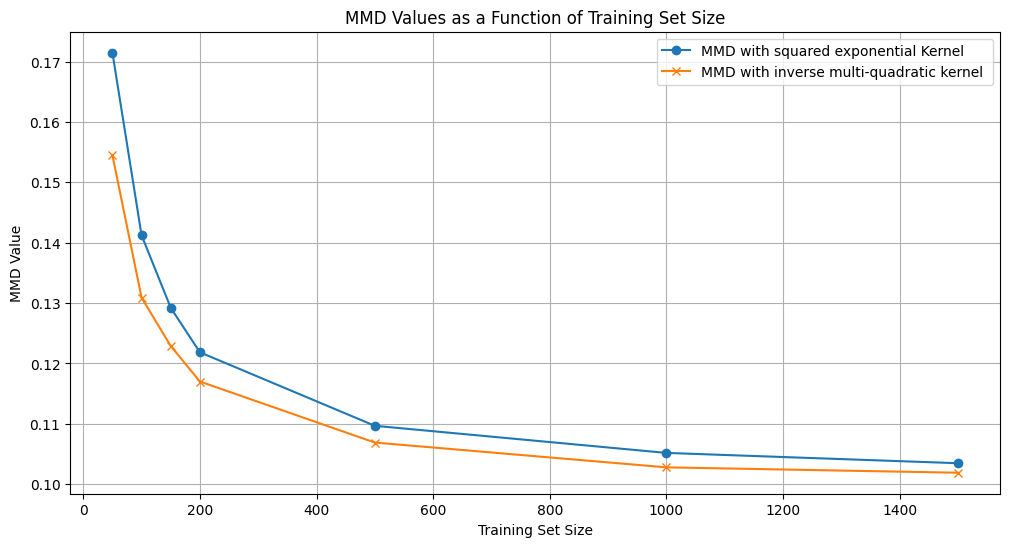

In [2]:
# Exploring the model accuracy with different training set sizes


training_set_sizes = [50, 100, 150, 200, 500, 1000, 1500]
mmd_se_values_GMM= []
mmd_mqk_values_GMM = []


for size in training_set_sizes:
    # Generate a new training dataset

    train_data = data[0:size,:]


    # GMM model with component=10
    n_components = 10
    gmm = GaussianMixture(n_components=n_components,  covariance_type='full',random_state=0)
    gmm.fit(train_data)

    #Generate samples from the fitted GMM
    num_samples = 100
    samples, _ = gmm.sample(num_samples)


    # Calculate MMD
    mmd_se_values_GMM.append(compute_mmd(se_kernel_custom(train_data, train_data), se_kernel_custom(samples, samples), se_kernel_custom(train_data, samples)))
    mmd_mqk_values_GMM.append(compute_mmd(mqk_kernel_custom(train_data, train_data), mqk_kernel_custom(samples, samples), mqk_kernel_custom(train_data, samples)))


# Plotting the MMD values as a function of training set size
plt.figure(figsize=(12, 6))

plt.plot(training_set_sizes, mmd_se_values_GMM, label='MMD with squared exponential Kernel', marker='o')
plt.plot(training_set_sizes, mmd_mqk_values_GMM, label='MMD with inverse multi-quadratic kernel ', marker='x')

plt.xlabel('Training Set Size')
plt.ylabel('MMD Value')
plt.title('MMD Values as a Function of Training Set Size')
plt.legend()
plt.grid(True)
plt.show()


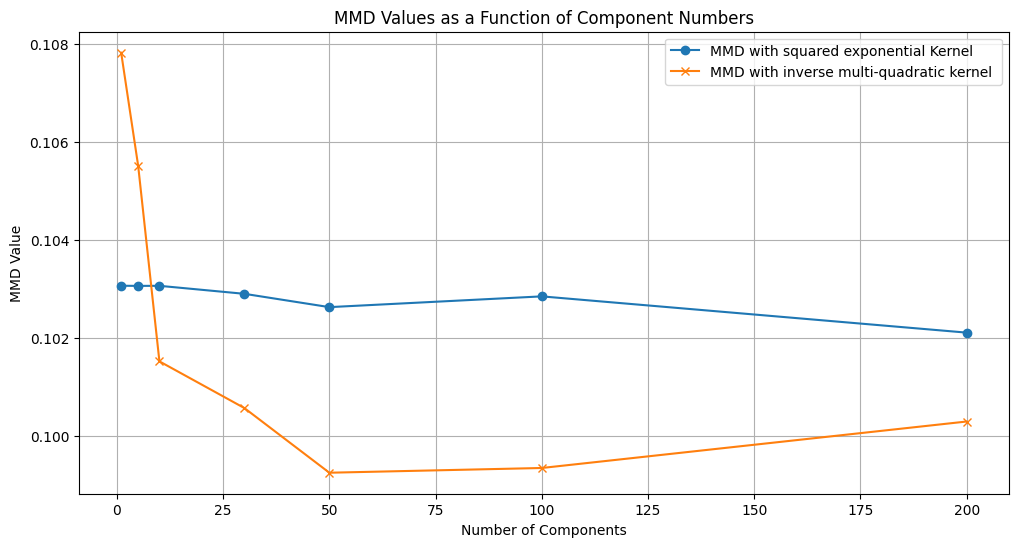

In [3]:
# Exploring the model accuracy with different numbers of components
component_sizes = [1,5,10,30,50,100,200]
mmd_se_values_GMM= []
mmd_mqk_values_GMM = []


for size in component_sizes:

    train_data = data
    gmm = GaussianMixture(n_components=size,  covariance_type='full',random_state=0)
    gmm.fit(train_data)

    #Generate samples from the fitted GMM
    num_samples = 100
    samples, _ = gmm.sample(num_samples)


    # Calculate MMD
    mmd_se_values_GMM.append(compute_mmd(se_kernel_custom(train_data, train_data), se_kernel_custom(samples, samples), se_kernel_custom(train_data, samples)))
    mmd_mqk_values_GMM.append(compute_mmd(mqk_kernel_custom(train_data, train_data), mqk_kernel_custom(samples, samples), mqk_kernel_custom(train_data, samples)))


# Plotting the MMD values as a function of training set size
plt.figure(figsize=(12, 6))

plt.plot(component_sizes, mmd_se_values_GMM, label='MMD with squared exponential Kernel', marker='o')
plt.plot(component_sizes, mmd_mqk_values_GMM, label='MMD with inverse multi-quadratic kernel ', marker='x')

plt.xlabel('Number of Components')
plt.ylabel('MMD Value')
plt.title('MMD Values as a Function of Component Numbers')
plt.legend()
plt.grid(True)
plt.show()